## Mengimport data menggunakan pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('.\DatasetEskperimen\CensusIncome\CencusIncome.data.txt')
data_test = pd.read_csv('.\DatasetEskperimen\CensusIncome\CencusIncome.test.txt')

In [3]:
data = pd.concat([data_train, data_test], keys=['train', 'test'])

## Mengubah kolom class menjadi numerik

In [4]:
def changeClassToNumber(x):
    if x == '<=50K':
        return 0
    elif x == '>50K':
        return 1
    else:
        return -1

In [5]:
data['class'] = data['class'].map(lambda x: changeClassToNumber(x))

## Menghandle missing value

In [6]:
print("Banyaknya data:", len(data))
print("--------------------------------------------------------------------")
print(data.info())

Banyaknya data: 48842
--------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48842 entries, (train, 0) to (test, 16280)
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
class             48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 6.0+ MB
None


Karena object yang memiliki missing value adalah object, maka missing value akan digantikan dengan nilai modus dari kolom tersebut

In [7]:
data["workclass"].fillna(data["workclass"].mode()[0], inplace=True)
data["occupation"].fillna(data["occupation"].mode()[0], inplace=True)
data["native-country"].fillna(data["native-country"].mode()[0], inplace=True)

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48842 entries, (train, 0) to (test, 16280)
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
class             48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


In [9]:
def one_hot_encode(df, label):
    onehot = pd.get_dummies(df[label],prefix=label)
    df.drop(label, axis=1,inplace = True)
    return df.join(onehot)

In [10]:
def changeSexToNumber(x):
    if x == 'Female':
        return 0
    elif x == 'Male':
        return 1
    else:
        return np.nan

#data.drop('race',axis=1, inplace=True)
#data.drop('native-country',axis=1, inplace=True)

In [11]:
data = one_hot_encode(data.drop("class", axis=1), "workclass").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "education").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "marital-status").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "occupation").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "relationship").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "race").join(data["class"])
data = one_hot_encode(data.drop("class", axis=1), "native-country").join(data["class"])
data['sex'] = data['sex'].map(lambda x: changeSexToNumber(x))

In [13]:
data.head(5)

age  fnlwgt  education-num  sex  capital-gain  capital-loss  \
train 0   39   77516             13    1          2174             0   
      1   50   83311             13    1             0             0   
      2   38  215646              9    1             0             0   
      3   53  234721              7    1             0             0   
      4   28  338409             13    0             0             0   

         hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
train 0              40                      0                    0   
      1              13                      0                    0   
      2              40                      0                    0   
      3              40                      0                    0   
      4              40                      0                    0   

         workclass_Never-worked  ...    native-country_Puerto-Rico  \
train 0                       0  ...                             0   
      1                       0  ...                             0   
      2                       0  ...                             0   
      3                       0  ...                             0   
      4                       0  ...                             0   

         native-country_Scotland  native-country_South  native-country_Taiwan  \
train 0                        0                     0                      0   
      1                        0                     0                      0   
      2                        0                     0                      0   
      3                        0                     0                      0   
      4                        0                     0                      0   

         native-country_Thailand  native-country_Trinadad&Tobago  \
train 0                        0                               0   
      1                        0                               0   
      2                        0                               0   
      3                        0                               0   
      4                        0                               0   

         native-country_United-States  native-country_Vietnam  \
train 0                             1                       0   
      1                             1                       0   
      2                             1                       0   
      3                             1                       0   
      4                             0                       0   

         native-country_Yugoslavia  class  
train 0                          0      0  
      1                          0      0  
      2                          0      0  
      3                          0      0  
      4                          0      0  

[5 rows x 105 columns]

In [14]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
feature = data.drop("class",axis=1).columns

In [15]:
feature

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=104)

In [16]:
scaler = StandardScaler()

In [17]:
data[feature] = scaler.fit_transform(data.drop("class", axis=1))

In [18]:
pca = PCA()
pca.fit(data[feature].values)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

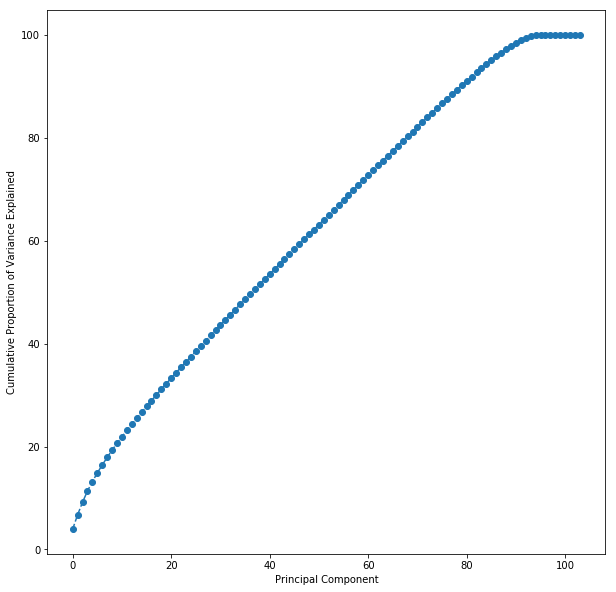

In [21]:
plt.figure(figsize=(10,10))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.plot(var1,"o--")
plt.savefig('PCA.png')
plt.show()

In [22]:
var1[85]

95.09999999999998

In [23]:
X_train = data.loc['train'].drop("class", axis=1).values
X_test = data.loc['test'].drop("class", axis=1).values
n = 85

In [24]:
pca = PCA(n_components=n)
pca.fit(data.drop("class", axis=1).values)

PCA(copy=True, iterated_power='auto', n_components=85, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [26]:
X_train.shape

(32561, 85)

In [29]:
data_train = pd.DataFrame(X_train).join(data.loc['train']['class'])
data_test = pd.DataFrame(X_test).join(data.loc['test']['class'])

In [33]:
col_name = []
for i in range(n):
    col_name.append("PC_"+str(i+1))
col_name.append("class")

In [34]:
data_train.columns = col_name
data_test.columns = col_name

In [36]:
data_train.to_csv('train.csv', index=False)
data_test.to_csv('test.csv', index=False)

## VALIDASI MODEL

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [38]:
def cross_val_check(clf, data, label, k=10):
    folds = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)
    folds.get_n_splits(data, label)
    accuracy = []
    for train_index, test_index in folds.split(data, label):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = label[train_index], label[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        
    plt.title("ACCURACY PLOT")
    plt.xlabel("K-th Fold")
    plt.ylabel("Accuracy")
    plt.xticks(range(k),range(1,k+1))
    plt.plot(accuracy, 'o--')
    plt.axhline(y=np.mean(accuracy), color='r', linestyle='-')
    plt.show()
    return accuracy

In [39]:
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    print(round(m,3), "(+/-)", round(h,3))

### DECISION TREE

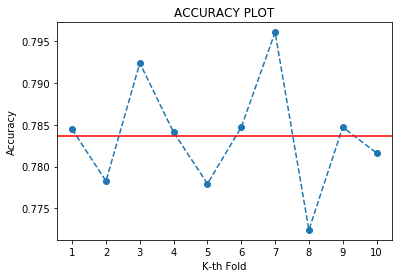

In [40]:
from sklearn.tree import DecisionTreeClassifier

DTL_clf = DecisionTreeClassifier()

acc = cross_val_check(DTL_clf, data_train.drop('class', axis=1).values, data_train['class'].values)

In [41]:
mean_confidence_interval(acc)

0.784 (+/-) 0.005


### NAIVE BAYES

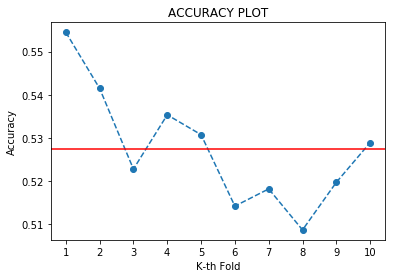

In [46]:
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
acc_NB = cross_val_check(NB_clf, data_train.drop('class', axis=1).values, data_train['class'].values)

In [47]:
mean_confidence_interval(acc_NB)

0.527 (+/-) 0.01


### K - NEAREST NEIGHBORS

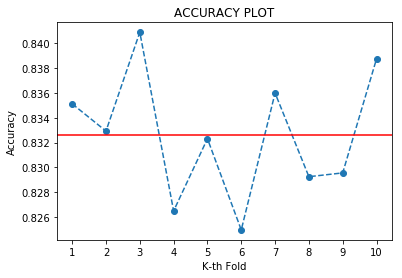

In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=15)
acc_KNN = cross_val_check(KNN_clf, data_train.drop('class', axis=1).values, data_train['class'].values)

In [49]:
mean_confidence_interval(acc_KNN)

0.833 (+/-) 0.004


### MULTI LAYER PERCEPTRON

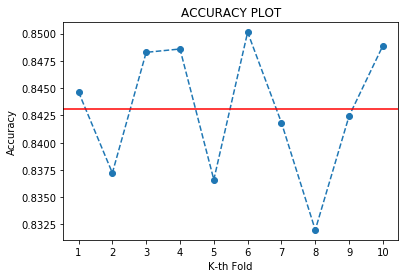

In [50]:
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(hidden_layer_sizes=(43,43),activation='logistic')
acc_MLP = cross_val_check(MLP_clf, data_train.drop('class', axis=1).values, data_train['class'].values)

In [51]:
mean_confidence_interval(acc_MLP)


0.843 (+/-) 0.004


## MELAKUKAN FULL TRAINING DAN MENAMPILKAN CONFUSION MATRIX

In [52]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    with plt.xkcd():
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], '.2f'),
                     horizontalalignment="center",
                     color="black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [53]:

def show_matrix(y_true, y_pred):    
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion Matrix')
    plt.show()

In [54]:
final_model = MLPClassifier(hidden_layer_sizes=(43,43),activation='logistic')
final_model.fit(data_train.drop('class',axis=1).values, data_train['class'].values)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(43, 43), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

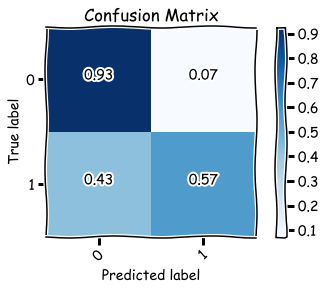

In [55]:
y_pred = final_model.predict(data_test.drop('class',axis=1).values)

show_matrix(data_test['class'].values, y_pred)

## MENYIMPAN SEMUA OBJECT

In [56]:
from sklearn.externals import joblib

In [57]:
joblib.dump(pca, "SavedObject/pca.pkl")
joblib.dump(scaler, "SavedObject/scaler.pkl")
joblib.dump(final_model, "SavedObject/model.pkl")

['SavedObject/model.pkl']